HOUSE PRICE PREDICTION SECOND PROJECT 

Taking further steps into the prediction of household price

The previous analysis give a very low test which failed in predicting the price of an household, in this project i converted the categorical data which is city into numerical data in other to get a better picture of how the factors aligned can best predict the price of an household. 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data_set=pd.read_csv('houseprice.csv')

In [34]:
data_set.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


In [35]:
data_set.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


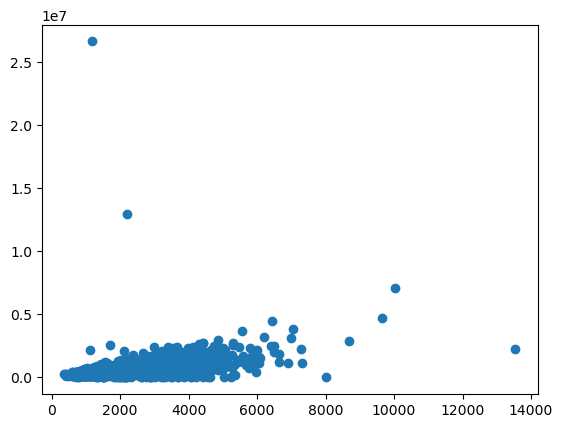

In [36]:
# PLot of living room square fit against price
plt.scatter(data_set['sqft_living'], data_set['price'])

In [37]:
# define the input x and the output/prediction (y)
y = data_set['price']
DData = data_set.drop(['date', 'price', 'city', 'street', 'statezip','country'], axis=1)   #axis give directive to drop column not row

In [38]:
data_set['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [39]:
data_set['city'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4600 entries, 0 to 4599
Series name: city
Non-Null Count  Dtype 
--------------  ----- 
4600 non-null   object
dtypes: object(1)
memory usage: 36.1+ KB


Using one hot encoding

In [40]:
pd.get_dummies(data_set['city'])

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
city = pd.get_dummies(data_set['city'])
city.head(4)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x = pd.concat([DData,city], axis=1)

In [43]:
x.head(4)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# we have to train the data on a regression model

from sklearn.linear_model import LinearRegression
regres = LinearRegression()

In [45]:
# sppliting the data into training set and testing set

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [46]:
#getting the shape of the x train and y train
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3680, 56)
(3680,)
(920, 56)
(920,)


In [47]:
# we need to train the data
regres.fit(x_train , y_train)

LinearRegression()

In [48]:
# we also need to test model against the data after the data is been trained 
regres.score(x_test, y_test)

0.06034694700753385

Basicallly 6.03% of the test signify that the independent variables which are (Bathroom, Living Rohadom, floor square metter etc) had a very low prediction on the house price.

6.03% had a little difference from the prevoius project on house price prediction having transform the categorical variable (city) to numerical variable using one hot encoding. However, the factors does'nt say much about the price of the house. In the next project I will work on tackling the outlier in the data set so as so get the real picture of the data. 